In [ ]:
!pip install hana-ml

In [5]:
from hana_ml import dataframe as hdf
import pandas as pd

In [6]:
from hana_ml.dataframe import ConnectionContext

In [9]:
cc = ConnectionContext('e8c8bf75-fd07-426a-9c7a-7e0d4c6d8562.hana.trial-us10.hanacloud.ondemand.com',443,'','')
print(cc.hana_version())

4.00.000.00.1678185420 (fa/CE2022.42)


In [10]:
print(f"Current database schema: {cc.get_current_schema()}")

Current database schema: DEVCHALLENGER


Check tables from Week 2 are available for this week's exercises


In [33]:
cc.get_tables()

,TABLE_NAME
0,BIKES
1,MONTHS
2,SEASONS


In [36]:
bikes_hdf=cc.table('BIKES').select(('"days_since_2011"', "Days_Counter"),
                                        ('add_days(\'2011-01-01\',"days_since_2011")', "CalDay"),
                                        ('"yr"', "Year"),
                                        ('"season"', "Season"),
                                        ('"mnth"', "Month"),
                                        ('"weekday"', "Weekday"),
                                        ('"workingday"', "Is_WorkingDay"),
                                        ('"holiday"', "Is_Holiday"),
                                        ('"weathersit"', "Weather"),
                                        ('"temp"', "Temperature"),
                                        ('"hum"', "Humidity"),
                                        ('"windspeed"', "Wind_Speed"),
                                        ('"cnt"', "Bikes_Rented")
                                       )

In [31]:
bikes_hdf.select?

In [37]:
bikes_hdf.select_statement

'SELECT "days_since_2011" AS "Days_Counter", add_days(\'2011-01-01\',"days_since_2011") AS "CalDay", "yr" AS "Year", "season" AS "Season", "mnth" AS "Month", "weekday" AS "Weekday", "workingday" AS "Is_WorkingDay", "holiday" AS "Is_Holiday", "weathersit" AS "Weather", "temp" AS "Temperature", "hum" AS "Humidity", "windspeed" AS "Wind_Speed", "cnt" AS "Bikes_Rented" FROM (SELECT * FROM "BIKES") AS "DT_26"'

In [39]:
bikes_hdf.head(5).collect().set_index('Days_Counter')

,CalDay,Year,Season,Month,Weekday,Is_WorkingDay,Is_Holiday,Weather,Temperature,Humidity,Wind_Speed,Bikes_Rented
Days_Counter,,,,,,,,,,,,
0,2011-01-01,2011,WINTER,JAN,SAT,NO WORKING DAY,NO HOLIDAY,MISTY,8.175849,80.5833,10.749882,985
1,2011-01-02,2011,WINTER,JAN,SUN,NO WORKING DAY,NO HOLIDAY,MISTY,9.083466,69.6087,16.652113,801
2,2011-01-03,2011,WINTER,JAN,MON,WORKING DAY,NO HOLIDAY,GOOD,1.229108,43.7273,16.636703,1349
3,2011-01-04,2011,WINTER,JAN,TUE,WORKING DAY,NO HOLIDAY,GOOD,1.400000,59.0435,10.739832,1562
4,2011-01-05,2011,WINTER,JAN,WED,WORKING DAY,NO HOLIDAY,GOOD,2.666979,43.6957,12.522300,1600


In [40]:
bikes_hdf.count()

731

Understand cells output

In [41]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity.default_value

'last_expr'

Data Visualization using Pandas Plots

In [42]:
from matplotlib import pyplot as plt

In [43]:
%matplotlib inline

In [44]:
plt.show?

Foundations of plotting with Matplotlib

<Axes: >

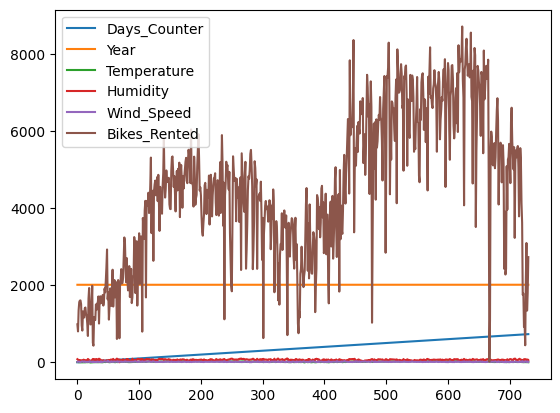

In [45]:
bikes_hdf.collect().plot()

In [46]:
plt.show()

Understand the default color cycler

In [47]:
prop_cycle_default = plt.rcParams['axes.prop_cycle']

In [48]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors_df = pd.Series(data=[1]*len(colors), index=colors)
display(colors_df)

#1f77b4    1
#ff7f0e    1
#2ca02c    1
#d62728    1
#9467bd    1
#8c564b    1
#e377c2    1
#7f7f7f    1
#bcbd22    1
#17becf    1
dtype: int64

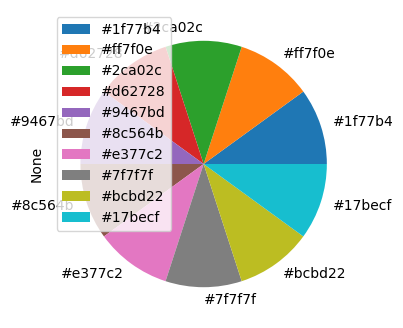

In [49]:
colors_df.plot(kind='pie', legend=True, figsize=(4,4))
plt.show()

Change color cycler to follow SAP Fiori branding

In [55]:
from cycler import cycler 
sap_fiori_belize_cycler = cycler(
    color=['#0092D1', '#E09D00', '#1A9898', '#E6600D', '#925ACE', '#759421', '#678BC7', '#C14646', '#647987', '#AB218E']
)

plt.rc('axes', prop_cycle=sap_fiori_belize_cycler)

Plot something meaningful

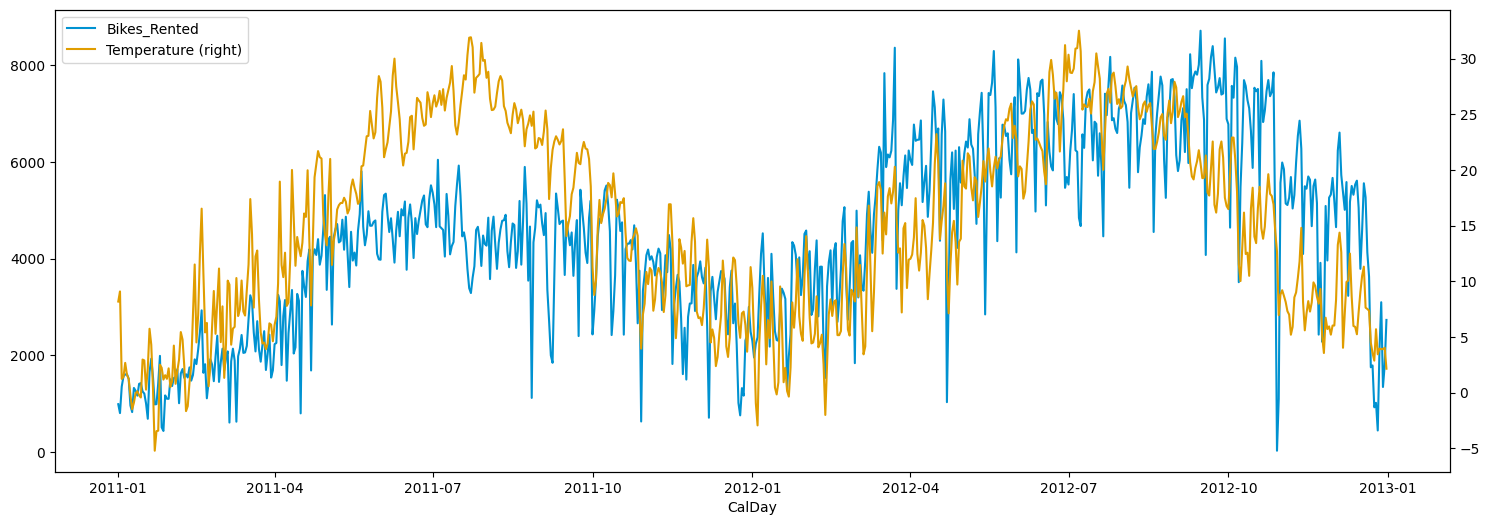

In [61]:
(bikes_hdf.select('CalDay', 'Bikes_Rented', 'Temperature').
 collect().plot(x='CalDay', secondary_y=['Temperature'],figsize=(18, 6)))
plt.show()



Set this figure size -- 18x6 inches -- as a new default for new figures in this notebook.

In [62]:
figsize_default=plt.rcParams["figure.figsize"]
print("Previous default figure size was : ", figsize_default)
plt.rcParams["figure.figsize"] = (18, 6)
print("Current default figure size is   : ", plt.rcParams["figure.figsize"])

Previous default figure size was :  [6.4, 4.8]
Current default figure size is   :  [18.0, 6.0]


Now, let's plot humidity and wind speed, but using next colors -- with indexes 2 and 3 -- from the current color cycler.

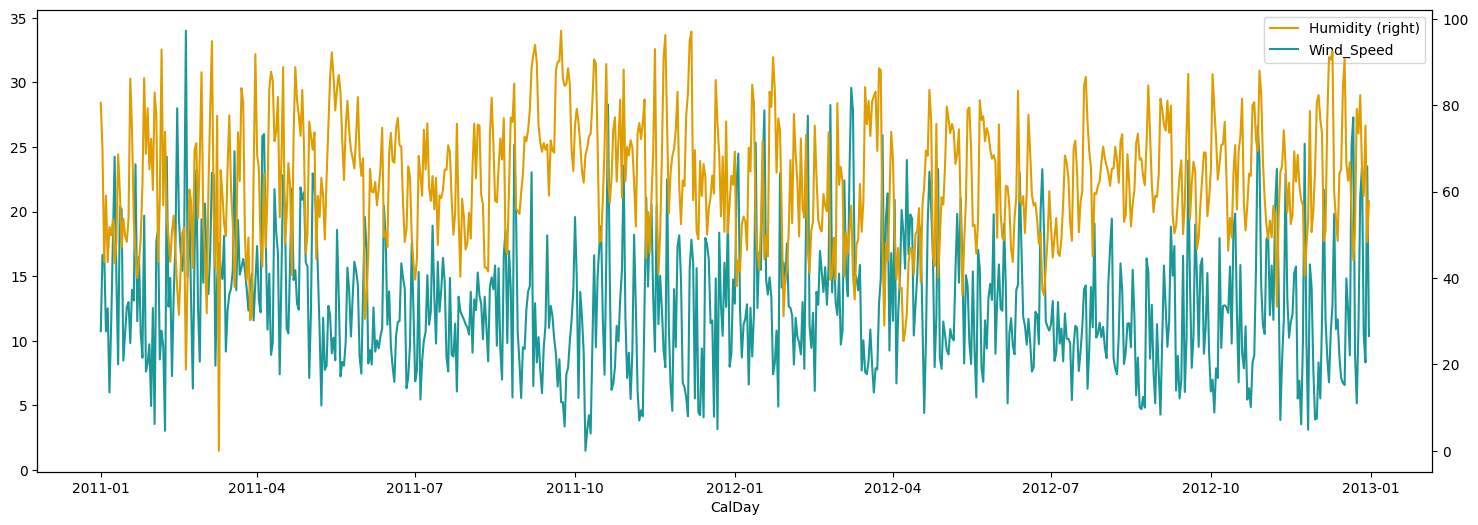

In [65]:
(bikes_hdf
 .select('CalDay', 'Humidity', 'Wind_Speed').collect()
 .plot(x='CalDay', secondary_y=['Humidity'], color=('#E09D00','#1A9898'))
)
plt.show()

Scaterplots

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


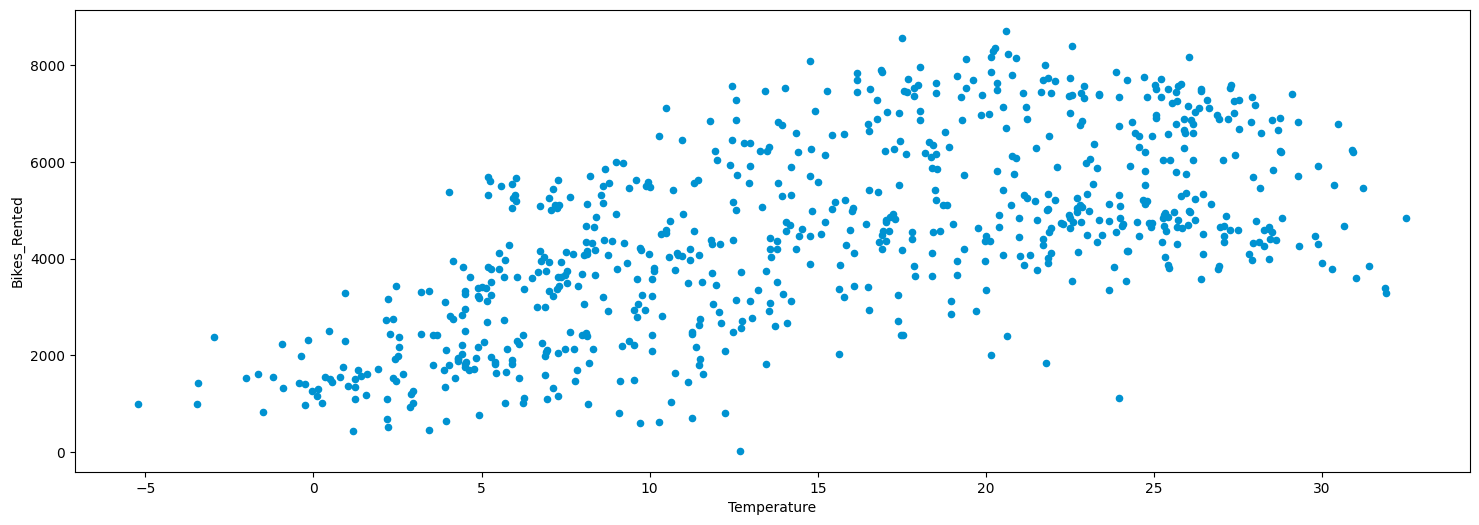

In [66]:
(bikes_hdf
 .select('Bikes_Rented', 'Humidity', 'Temperature').collect()
 .plot.scatter(y='Bikes_Rented', x='Temperature')
)
plt.show()

Add color coding for humidity values.

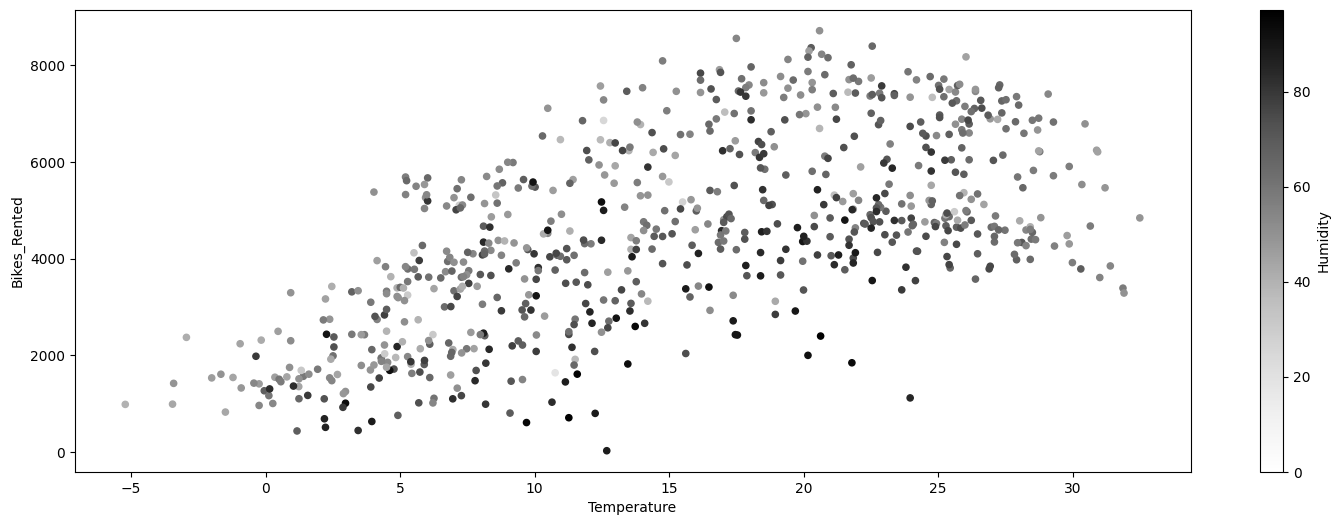

In [68]:
(bikes_hdf
 .select('Bikes_Rented', 'Temperature', 'Humidity').collect()
 .plot.scatter(y='Bikes_Rented', x='Temperature', c='Humidity')
)
plt.show()

Replace color coding to use a Season column. To avoid default monochrome colormap used for categorical data, explicitely specify a colormap to be viridis.

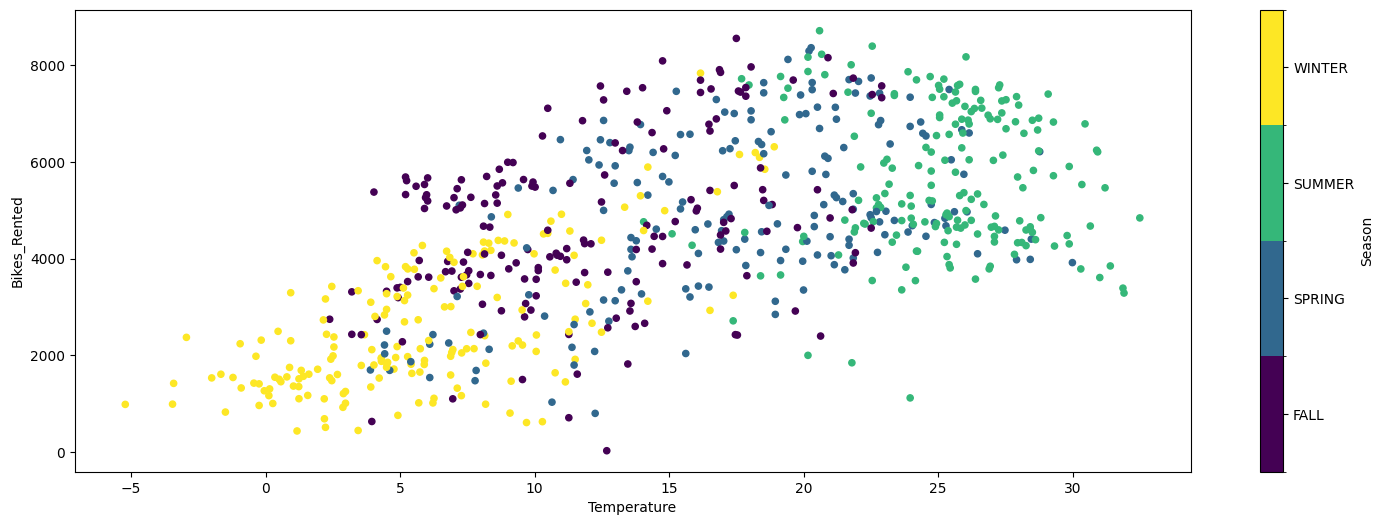

In [71]:
(bikes_hdf
 .select('Bikes_Rented', 'Temperature', 'Season').collect().astype({"Season": 'category'})
 .plot.scatter(y='Bikes_Rented', x='Temperature', c='Season', 
               colormap='viridis' #try to comment this like to see the difference
              )
)
plt.show()

Now do the same for a Year column.

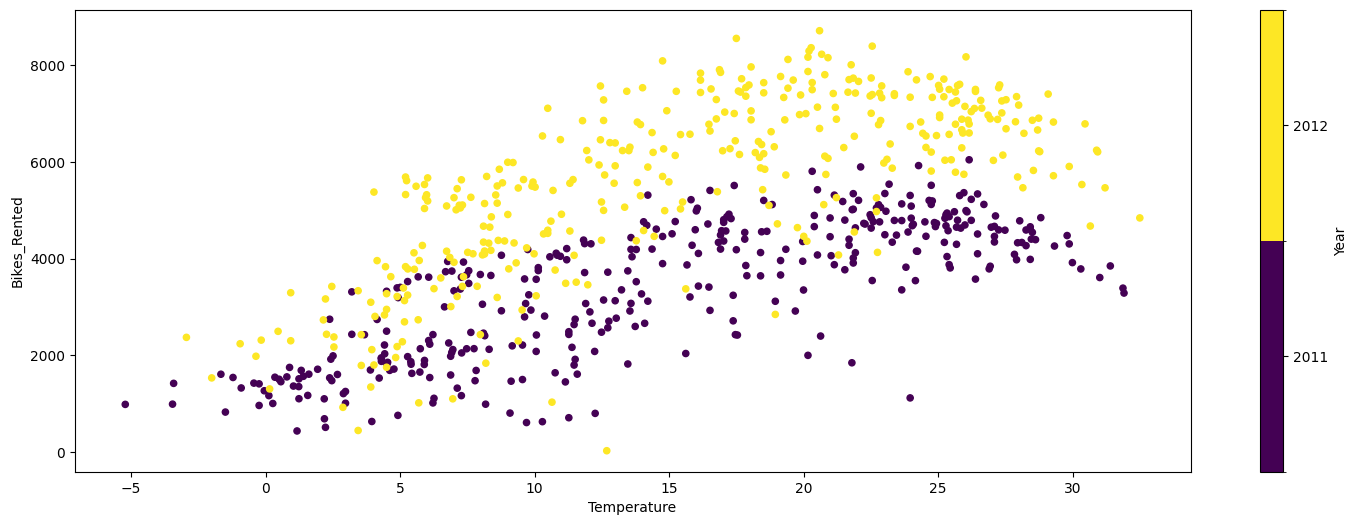

In [73]:
(bikes_hdf
 .select('Bikes_Rented', 'Temperature', 'Year').collect().astype({"Year": 'category'})
 .plot.scatter(y='Bikes_Rented', x='Temperature', c='Year', colormap='viridis')
)
plt.show()

Plot categorical data

Visualize how often each weather situation occured in the HANA DataFrame.

In [74]:
weather_df=bikes_hdf.value_counts(['Weather']).collect().set_index('VALUES')
display(weather_df)

,NUM_Weather
VALUES,
MISTY,247
GOOD,463
RAIN/SNOW/STORM,21


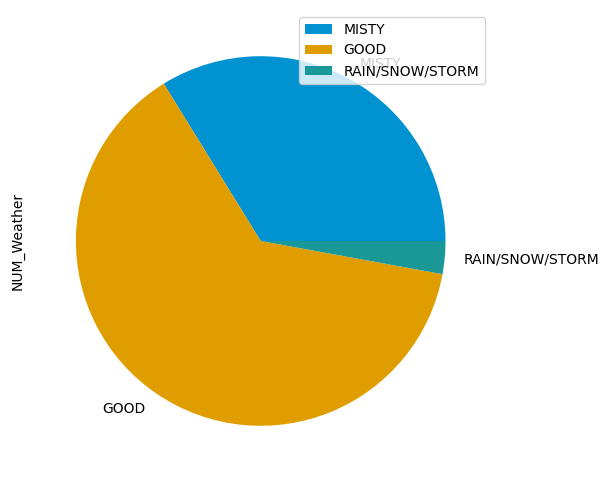

In [75]:
(weather_df
 .plot.pie(y = 'NUM_Weather')
)
plt.show()

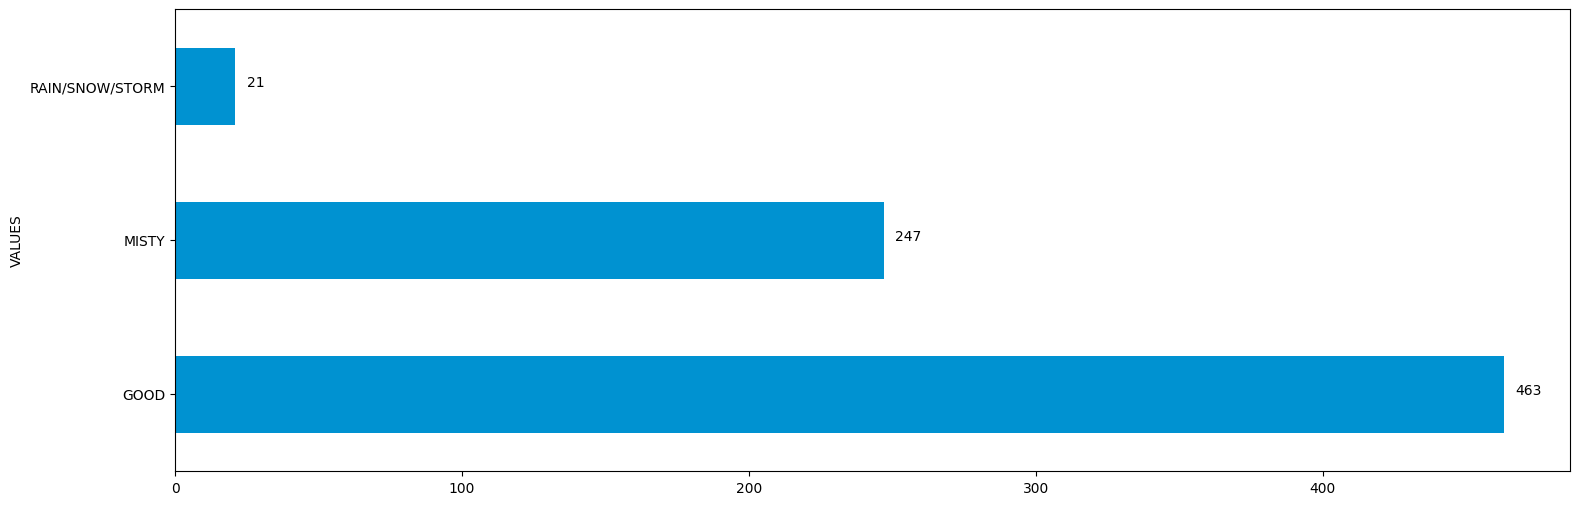

In [76]:
(weather_df
 .sort_values('NUM_Weather', ascending=False)
 .plot.barh(legend=False)
)

#Using text annotations to calculate positions and place values next to their corresponding bars
for i in range(len(weather_df)):
    plt.text(y = i, 
             x = weather_df.sort_values('NUM_Weather', ascending=False).NUM_Weather[i]+4, # x position
             s = weather_df.sort_values('NUM_Weather', ascending=False).NUM_Weather[i],   # text to display
             ha = 'left')
plt.show()

Data Visulaization using hana-ml EDA

In [77]:
from hana_ml.visualizers.eda import EDAVisualizer

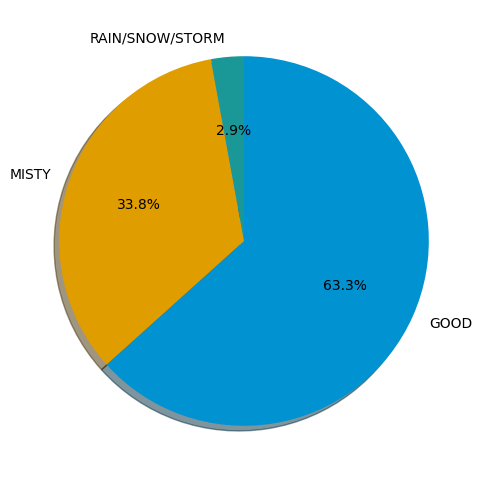

In [90]:
df = EDAVisualizer().pie_plot(data=bikes_hdf, column='Weather',
                                 legend=False, explode=0, 
                                 startangle=90, counterclock=False)
plt.show()